[0.40710649 0.06600984 0.34882053 0.1109981  0.80823521 0.94768803
 0.07231648 0.95511521 0.5225766  0.29956568 0.07686208 0.50062427
 0.79451554 0.70708648 0.05022601 0.07290184 0.40287328 0.29529049
 0.23238432 0.2810045 ]


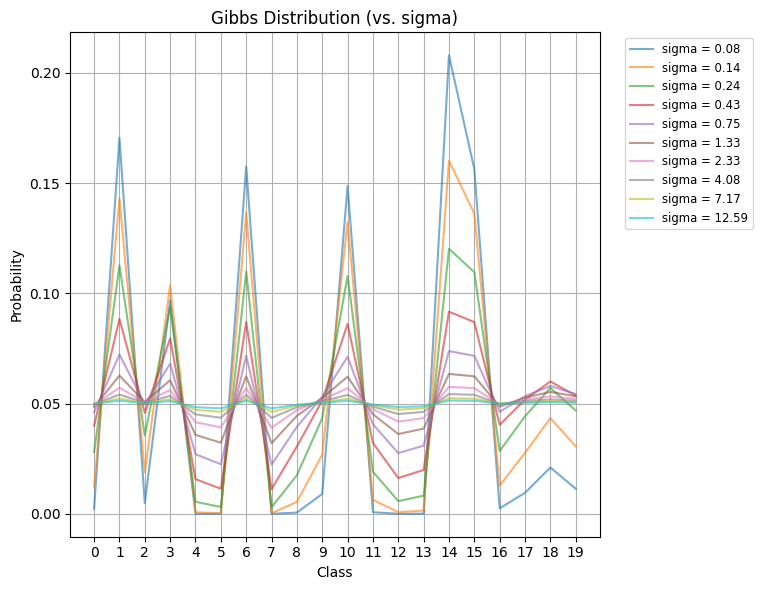

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def gibbs_prob_dist(energies, sigma):
    if sigma == 0:
        probs = np.zeros(len(energies))
        probs[np.argmin(energies)] = 1.0
        return probs
    unnormalized_probs = np.exp(-energies / sigma) 
    return unnormalized_probs / np.sum(unnormalized_probs)

k = 20
sigmas = np.logspace(-1.1, 1.1, 10)
energies = np.random.rand(k)
print(energies)

plt.figure(figsize=(8, 6))

for sigma in sigmas:
    probs = gibbs_prob_dist(energies, sigma)
    plt.plot(range(k), probs, label=f'sigma = {sigma:.2f}', alpha=0.6)

plt.xlabel('Class')
plt.ylabel('Probability')
plt.title(f'Gibbs Distribution (vs. sigma)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize='small')
plt.xticks(np.arange(k))
plt.grid(True)

plt.tight_layout()
plt.show()

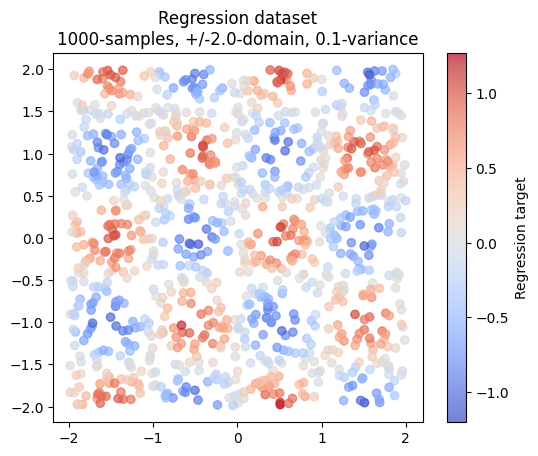

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_regression_dataset(samples=1000, domain_range=2.0, variance=0.1, seed=42):
    np.random.seed(seed)
    x1 = np.random.uniform(-domain_range, domain_range, samples)
    x2 = np.random.uniform(-domain_range, domain_range, samples)
    x = np.column_stack((x1, x2))
    y = np.sin(x1 * np.pi) * np.cos(x2 * np.pi) + np.random.normal(0, variance, samples)
    return x, y

samples = 1000
domain_range = 2.0
variance = 0.1

x, y = generate_regression_dataset(samples, domain_range, variance)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Regression target')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Regression dataset\n{samples}-samples, +/-{domain_range}-domain, {variance}-variance')
plt.show()


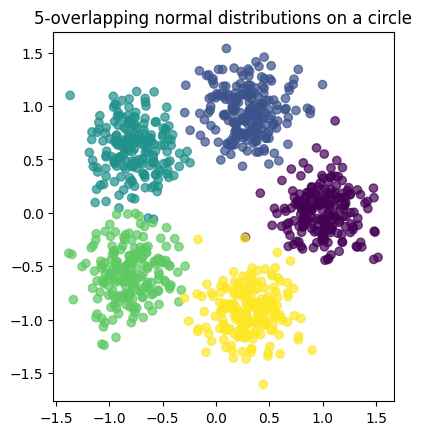

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_mixture_on_circle(n_classes=3, samples_per_class=100, radius=5.0, variance=1.0, seed=42):
    x, y = [], []
    
    np.random.seed(seed)
    angles = np.linspace(0, 2 * np.pi, n_classes, endpoint=False)
    
    for i, angle in enumerate(angles):
        mean = np.array([radius * np.cos(angle), radius * np.sin(angle)])
        covariance = np.eye(2) * variance
        samples = np.random.multivariate_normal(mean, covariance, samples_per_class)
        x.append(samples)
        y.append(np.full(samples_per_class, i))
    
    return np.vstack(x), np.hstack(y)

radius = 1.0
n_classes = 5
variance = 0.05
samples_per_class = 200

x, y = generate_gaussian_mixture_on_circle(n_classes, samples_per_class, radius, variance) 

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"{n_classes}-overlapping normal distributions on a circle")
plt.show()